In [20]:
import numpy as np
from sklearn.cluster import KMeans
import cv2
import datetime
from matplotlib import pyplot as plt
import time

In [21]:
image1=cv2.imread("mri1.jpg")
image2=cv2.imread("mri2.jpg")
image3=cv2.imread("Berlin.jpg")
image=[image1,image2,image3]
reshaped=[0,0,0]
for i in range(0,3):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [22]:
numClusters=list(map(int,input("Enter the number of culsters for image 1,2 and 3 respectively: ").split(" ")))

Enter the number of culsters for image 1,2 and 3 respectively: 3 3 3


In [23]:
clustering=[0,0,0]
for i in range(0,3):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [24]:
sortedLabels=[[],[],[]]
for i in range(0,3):
    sortedLabels[i] = sorted([n for n in range(numClusters[i])],
        key=lambda x: -np.sum(clustering[i] == x))

In [25]:
kmeansImage=[0,0,0]
concatImage=[[],[],[]]
for j in range(0,3):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters[j] - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0], int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j], cv2.COLOR_GRAY2BGR)), axis=1)

AxesImage(54,36;334.8x217.44)


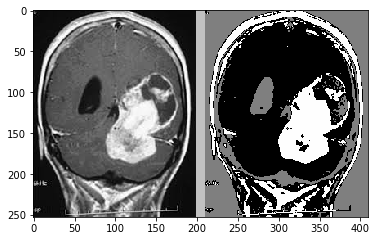

In [26]:
print(plt.imshow(concatImage[0]))

AxesImage(54,36;334.8x217.44)


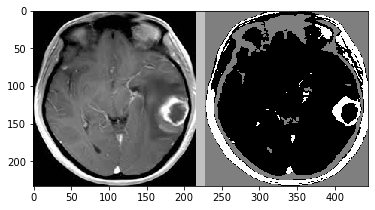

In [27]:
print(plt.imshow(concatImage[1]))

AxesImage(54,36;334.8x217.44)


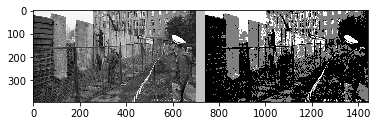

In [28]:
print(plt.imshow(concatImage[2]))

In [29]:
for i in range(0,3):
    dt = datetime.datetime.now()
    fileExtension = "png"
    filename = (str(dt.hour)
        + ':'+str(dt.minute) + ':'+str(dt.second)
        + ' C_' + str(numClusters[i]) + '.' + fileExtension)
    print(filename)
    time.sleep(1)
    cv2.imwrite(filename, concatImage[i])

20:59:0 C_3.png
20:59:1 C_3.png
20:59:2 C_3.png
